In [119]:
import pandas as pd

# example:
# b = trim_float(71.013829,4)
def trim_float(number,digits):
    zeros = '0' * digits
    scale = int('1'+zeros)
    #trimmed float number
    return float(int(number * scale) / scale)


##Read TSV file
# TSV is a file type where fields are separated by tab. 
tsv_file='../Datasets/output_quantification_Linked_data_exp4.tsv'
seqera_outcome_original = pd.read_table(tsv_file,sep='\t')

##Read CSV file
# seqera_outcome_original = pd.read_csv('../Datasets/output_quantification_exp3.csv')
#seqera_outcome_original = pd.read_csv('../Datasets/output_quantification_exp4.csv')


print(f'shape: { seqera_outcome_original.shape}')

data_info = seqera_outcome_original.info()
print(data_info)

print(seqera_outcome_original.head())


# control_samples = ['PS-001_neg.mzML',
#                   'PS-002_neg.mzML',
#                   'PS-003_neg.mzML']

# treatment_samples = ['PS-004_neg.mzML',
#                   'PS-005_neg.mzML',
#                   'PS-006_neg.mzML']

control_samples = ['PS-001_pos.mzML',
                  'PS-002_pos.mzML',
                  'PS-003_pos.mzML']

treatment_samples = ['PS-004_pos.mzML',
                  'PS-005_pos.mzML',
                  'PS-006_pos.mzML']


control_mean = ['control_mean']
experimental_mean = ['experimental_mean']

target_columns = ['mz']+control_samples+treatment_samples



shape: (49495, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49495 entries, 0 to 49494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               49495 non-null  uint64 
 1   charge           49495 non-null  int64  
 2   RT               49495 non-null  float64
 3   mz               49495 non-null  float64
 4   quality          49495 non-null  float64
 5   PS-004_pos.mzML  49495 non-null  float64
 6   PS-005_pos.mzML  49495 non-null  float64
 7   PS-006_pos.mzML  49495 non-null  float64
 8   PS-003_pos.mzML  49495 non-null  float64
 9   PS-002_pos.mzML  49495 non-null  float64
 10  PS-001_pos.mzML  49495 non-null  float64
 11  adduct           3121 non-null   object 
 12  feature_ids      49495 non-null  object 
dtypes: float64(9), int64(1), object(2), uint64(1)
memory usage: 4.9+ MB
None
                     id  charge          RT           mz   quality  \
0    732625925117994362       0  4

In [120]:
combined_dataset = seqera_outcome_original
dataset = seqera_outcome_original[target_columns]
print(dataset.info())

print(f'dataset shape: { dataset.shape}')

#Drop rows that contain at least one zero
dataset = dataset[(dataset != 0).all(1)]

# # drop rows with all zeros
# dataset = dataset.loc[(dataset!=0).any(axis=1)]


print(f'dataset shape: { dataset.shape}')

print(dataset.describe())


#trim values of mz to 4 digits for better count
mzTrimmed = dataset['mz'].apply(lambda x: trim_float(x,4))
dataset['mzTrim'] = mzTrimmed
combined_dataset['mzTrim'] = mzTrimmed

#take mean of the control samples
ctrlMean = round(dataset[control_samples].mean(axis=1))
dataset['control_mean'] = ctrlMean.astype('int64')
combined_dataset['control_mean'] = ctrlMean.astype('int64')

#take mean of the experiment samples
treatMean = dataset[treatment_samples].mean(axis=1)
dataset['treatment_mean'] = treatMean.astype('int64')
combined_dataset['treatment_mean'] = treatMean.astype('int64')


# Count occurrences of unique values in the category column
mz_counts = dataset['mzTrim'].value_counts()

# mz_counts = mz_counts.sort_values(ascending=True)
# mz_counts = mz_counts.sort_index(ascending=True)

print('value_counts_mz: ', mz_counts)
print('Detected unique metabolites: ', len(mz_counts))

print('====')
print(dataset.info())

# print('====')
# print(combined_dataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49495 entries, 0 to 49494
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mz               49495 non-null  float64
 1   PS-001_pos.mzML  49495 non-null  float64
 2   PS-002_pos.mzML  49495 non-null  float64
 3   PS-003_pos.mzML  49495 non-null  float64
 4   PS-004_pos.mzML  49495 non-null  float64
 5   PS-005_pos.mzML  49495 non-null  float64
 6   PS-006_pos.mzML  49495 non-null  float64
dtypes: float64(7)
memory usage: 2.6 MB
None
dataset shape: (49495, 7)
dataset shape: (160, 7)
                mz  PS-001_pos.mzML  PS-002_pos.mzML  PS-003_pos.mzML  \
count   160.000000     1.600000e+02     1.600000e+02     1.600000e+02   
mean    479.358087     5.949548e+07     5.331519e+07     8.850235e+07   
std     244.573582     2.178193e+08     1.891272e+08     4.060769e+08   
min      88.075508     1.598427e+04     1.713409e+04     6.794328e+03   
25%     265.650315

In [121]:

#Combine all mzTrim that have the same value
mz_control = dataset.groupby('mzTrim', group_keys=True)['control_mean'].sum()
mz_treatment = dataset.groupby('mzTrim', group_keys=True)['treatment_mean'].sum()

type(mz_control)

print(mz_control)

# mz_control.to_csv('mz_control.csv', index=True, encoding='')
# mz_treatment.to_csv('mz_treatment.csv', index=True, encoding='')


# data = {"mzTrim": mz_control('mzTrim'),
#         "control_mean": mz_control('control_mean'),
#         "treatment_mean": mz_treatment('treatment_mean')}

grouped_mz = pd.DataFrame(mz_control)
temporal = pd.DataFrame(mz_treatment)
grouped_mz['treatment_mean']=temporal['treatment_mean']

print(grouped_mz)

print('====')
print(grouped_mz.info())


# # grouped_mz['treatment_mean'] = mz_treatment('treatment_mean')

len(grouped_mz)


mzTrim
88.0755        38189043
99.0745         2955229
99.0746          444617
114.0660     1186184467
123.0789        1564360
                ...    
1004.6422        368814
1006.6562        254596
1014.6279        215190
1025.6755        728120
1088.6292        607663
Name: control_mean, Length: 155, dtype: int64
           control_mean  treatment_mean
mzTrim                                 
88.0755        38189043        48420230
99.0745         2955229         1606191
99.0746          444617         2268312
114.0660     1186184467      1368560333
123.0789        1564360          585377
...                 ...             ...
1004.6422        368814          537088
1006.6562        254596          361145
1014.6279        215190          467725
1025.6755        728120          923378
1088.6292        607663          278075

[155 rows x 2 columns]
====
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 88.0755 to 1088.6292
Data columns (total 2 columns):
 #   Column          No

155

In [122]:

#Save data sets to CSV files
# combined_dataset.to_csv('out_data_combined.csv', index=False, encoding='')
dataset.to_csv('out_data_clean.csv', index=False, encoding='')  # Index will determine if the index will be saved
mz_counts.to_csv('mz_counts.csv', index=True, encoding='')  # Index will determine if the index will be saved

grouped_mz.to_csv('grouped_mz.csv', index=True, encoding='')



In [123]:
import plotly.express as px


# Create a scatter plot
fig = px.line(grouped_mz)

# Show the interactive plot
fig.show()


In [124]:

control_dataset =  dataset.groupby("mzTrim", group_keys=True)[['control_mean']].apply(lambda x: x)
treatment_mean =  dataset.groupby("mzTrim", group_keys=True)[['treatment_mean']].apply(lambda x: x)

treatment_mean

# # 5.894115e+05
# q25 = dataset.describe().quantile(0.25)
# low_level = round(q25['control_mean'])


#Drop rows where control mean is less than the 25% quantile
# dataset = dataset[(dataset['control_mean'] < low_level).all(1)]
# dataset = dataset.loc[(dataset['control_mean'] < low_level).any(axis=1)]


#take mean of experimental samples


# #Re-arrange data
# target_columns = ['mzTrim']+control_samples+treatment_samples

# dataset = dataset[target_columns]

# data_head = dataset.head(20)
# print(data_head)


,,treatment_mean
mzTrim,,
88.0755,84,48420230
99.0745,142,1606191
99.0746,144,2268312
114.0660,124,1368560333
123.0789,90,585377
...,...,...
1004.6422,5,537088
1006.6562,107,361145
1014.6279,2,467725


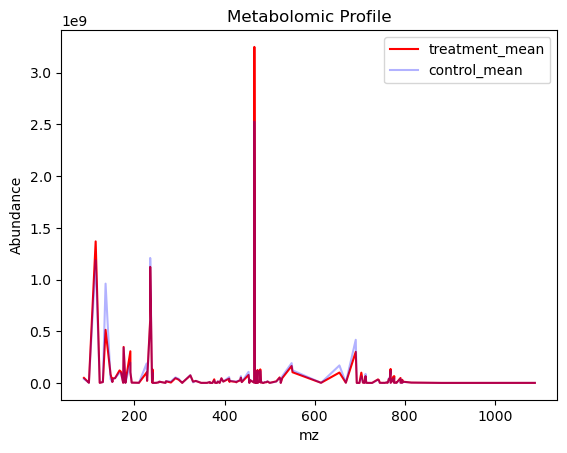

In [125]:
import matplotlib.pyplot as plt


#plot bar chart = plot(kind='bar'), this takes very long time!

# control = dataset['control_mean']
# treatment = dataset['treatment_mean']
control = mz_control
treatment = mz_treatment 


treatment.plot(color='red')
control.plot(color='blue',alpha=0.3)

# mz = dataset['mzTrim'] 
# control = dataset['control_mean']
# test = dataset['treatment_samples']
# plt.scatter(mz, control, color='green', marker='.', label='control')
# plt.scatter(mz, test, color='blue', marker='.', label='test')

# Add labels and title
plt.xlabel('mz')
plt.ylabel('Abundance')
plt.title('Metabolomic Profile')

# Add a legend
plt.legend()

plt.show()



No handles with labels found to put in legend.


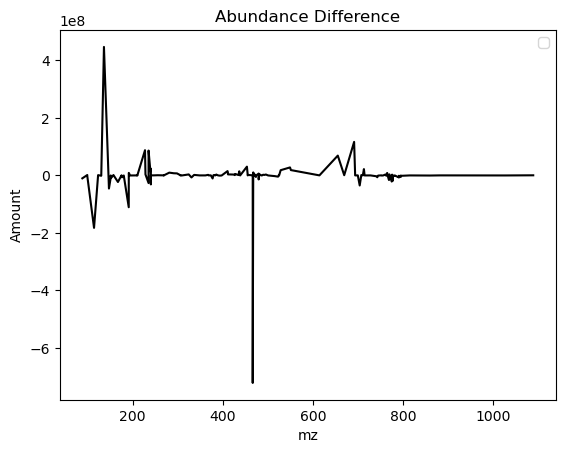

In [126]:
import numpy as np

difference = control-treatment

data = np.ones(1,difference)*difference

# colr = difference>0, 'red'
# colr = difference<=0, 'blue'

# colr = 'red' if(difference>0) else 'blue'

# colr = np.where(data<0,'b','r')
# colr = np.where(data<0,'r',np.where(data>0,'b','r'))

difference.plot(color='k')

# Add labels and title
plt.xlabel('mz')
plt.ylabel('Amount')
plt.title('Abundance Difference')

ax = plt.gca()
# ax.set_xlim([0, 3])
# ax.set_ylim([0, 1e9])

# Add a legend
plt.legend()

plt.show()


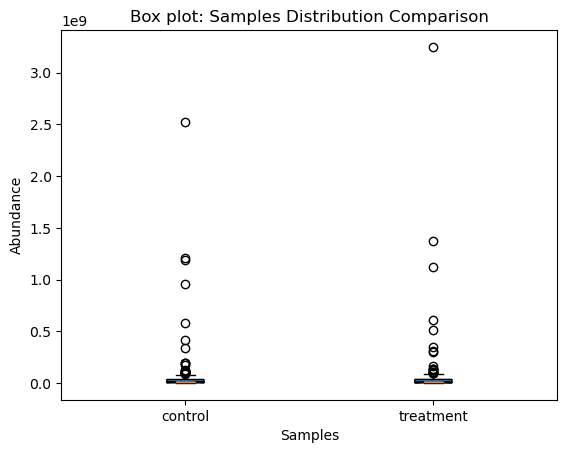

In [127]:
data = [control, treatment]

plt.boxplot(data, labels=['control', 'treatment'], patch_artist=True, notch=True)

plt.xlabel('Samples')
plt.ylabel('Abundance')
plt.title('Box plot: Samples Distribution Comparison')

# ax = plt.gca()
# ax.set_xlim([0, 3])
# ax.set_ylim([0, 1e7])


plt.show()

In [128]:


# # Generate data for a bar chart
# categories = ['Category A', 'Category B', 'Category C']
# values = [25, 40, 15]

# # Create a bar chart
# plt.bar(categories, values, color='orange', edgecolor='black', label='Bar chart')

# # Add labels and title
# plt.xlabel('Categories')
# plt.ylabel('Values')
# plt.title('Bar chart: Category comparison')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()


In [129]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.spines['left'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('zero')
# ax.spines['top'].set_color('none')
# plt.axis([-5,5,-5,5])
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# plt.grid()
# plt.arrow(0,0, 3,1, head_width=0.2, color='r', length_includes_head=True, label='u')
# plt.arrow(0,0, 1,3, head_width=0.2, color='r', length_includes_head=True, label='v')
# plt.arrow(0,0, 4,4, head_width=0.2, color='r', length_includes_head=True, label='u+v')
# ax.legend()